# <center>EXPLORATORY DATA ANALYSIS

In this section, we perform descriptive statistics and visualize the distribution of variables.

Import necessary libraries and load the cleaned dataset.


In [ ]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from pandas.api import types as pdtypes
import textwrap


In [ ]:
#load the clean csv after data cleaning and feature engineering
df = pd.read_csv('u5mr_clean.csv')
df.head()

,CASEID,Age in 5-year groups,Region,Type of place of residence,Highest educational level,Religion,Ethnicity,Number of household members (listed),Wealth index combined,"Type of cooking fuel (smoke exposure, indoor air pollution)",...,Received inactivated polio (IPV)_missing,Received Rotavirus 2_missing,Place where most vaccinations were received_missing,Yellow fever vaccine_missing,Given child anything other than breast milk_missing,Visited health facility last 12 months_missing,Getting medical help for self: distance to health facility_missing,Mode of transportation to nearest healthcare facility_missing,prenatal_help_missing,delivery_help_missing
0,1 4 2,30-34,Mombasa,Urban,No education,Islam,Somali,6,Richer,LPG,...,0,0,0,1,0,0,0,0,0,0
1,1 13 2,35-39,Mombasa,Urban,Secondary,Catholic,Kamba,8,Richest,LPG,...,1,1,1,1,1,0,0,0,1,1
2,1 26 2,25-29,Mombasa,Urban,Secondary,Evangelical churches,Kamba,5,Richer,LPG,...,1,1,1,1,1,0,0,0,1,1
3,1 42 1,30-34,Mombasa,Urban,Secondary,African instituted churches,Kamba,3,Richest,LPG,...,1,1,1,1,1,1,1,1,1,1
4,1 55 2,30-34,Mombasa,Urban,Secondary,Protestant,Kamba,4,Richest,LPG,...,0,0,0,1,1,1,1,1,0,0


In [3]:
df.select_dtypes(['object','category'])

,CASEID,Age in 5-year groups,Region,Type of place of residence,Highest educational level,Religion,Ethnicity,Wealth index combined,"Type of cooking fuel (smoke exposure, indoor air pollution)",Sex of child,...,Given child anything other than breast milk,In contact with someone with cough or TB,Source of drinking water,Main floor material,Visited health facility last 12 months,Getting medical help for self: distance to health facility,Mode of transportation to nearest healthcare facility,mortality_category,prenatal_help,delivery_help
0,1 4 2,30-34,Mombasa,Urban,No education,Islam,Somali,Richer,LPG,Male,...,Yes,No,Public tap/standpipe,Cement,No,Big problem,Public bus,Alive or 5+,1,1
1,1 13 2,35-39,Mombasa,Urban,Secondary,Catholic,Kamba,Richest,LPG,Female,...,No,No,Piped to yard/plot,Cement,Yes,Not a big problem,Walking,Alive or 5+,1,1
2,1 26 2,25-29,Mombasa,Urban,Secondary,Evangelical churches,Kamba,Richer,LPG,Male,...,No,No,Piped to neighbor,Carpet,No,Not a big problem,Walking,Alive or 5+,1,1
3,1 42 1,30-34,Mombasa,Urban,Secondary,African instituted churches,Kamba,Richest,LPG,Female,...,No,No,Public tap/standpipe,Carpet,Yes,Not a big problem,Walking,Alive or 5+,1,1
4,1 55 2,30-34,Mombasa,Urban,Secondary,Protestant,Kamba,Richest,LPG,Male,...,No,No,Public tap/standpipe,Carpet,Yes,Not a big problem,Walking,Alive or 5+,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19525,1692 18 2,35-39,Nairobi,Urban,Higher,Evangelical churches,Kikuyu,Richest,LPG,Female,...,No,No,Bottled water,Parquet or polished wood,Yes,Not a big problem,Walking,Alive or 5+,1,1
19526,1692 18 2,35-39,Nairobi,Urban,Higher,Evangelical churches,Kikuyu,Richest,LPG,Male,...,No,No,Bottled water,Parquet or polished wood,Yes,Not a big problem,Walking,Alive or 5+,1,1
19527,1692 66 2,35-39,Nairobi,Urban,Secondary,Islam,NaN,Richest,LPG,Female,...,No,No,Bottled water,Parquet or polished wood,Yes,Not a big problem,Walking,Alive or 5+,1,1
19528,1692 84 2,35-39,Nairobi,Urban,Higher,Catholic,Kikuyu,Richest,LPG,Male,...,No,No,Piped into dwelling,Wood planks,No,Not a big problem,Car/truck,Alive or 5+,1,1


We will proceed with exploratory data analysis, where we will explore the mortality figures in neonates, infants and children aged 1-5 using visualizations.

## 1. Mortality Plots

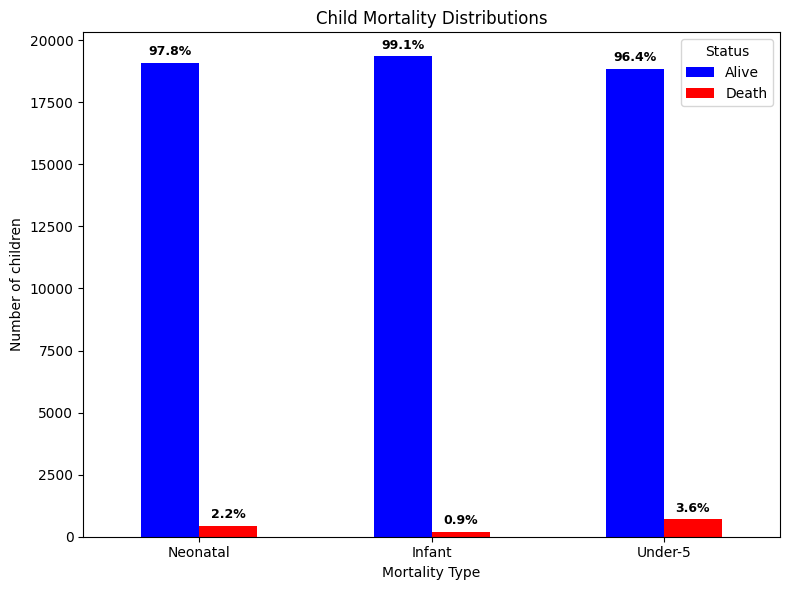

In [4]:
#Plot Child Mortality Distributions
# Prepare data
mortality_cols = {
    "neonatal_mortality": "Neonatal",
    "infant_mortality": "Infant",
    "under5_mortality": "Under-5"
}

counts = pd.DataFrame({
    label: df[col].value_counts().sort_index()
    for col, label in mortality_cols.items()
}).T

# Ensure Alive=0, Death=1 order
counts = counts[[0, 1]]
counts.columns = ["Alive", "Death"]

# Plot grouped bar chart
ax = counts.plot(
    kind="bar",
    stacked=False,
    color=["blue", "red"],
    figsize=(8, 6)
)

# Add percentage labels correctly using bar containers
for container in ax.containers:
    # Get group total per mortality type
    for bar in container:
        height = bar.get_height()
        if height > 0:
            # Total of the group (Alive+Death)
            total = counts.loc[bar.get_x() + bar.get_width()/2, :].sum() if False else None
        # Better way: use index position
    for i, bar in enumerate(container):
        height = bar.get_height()
        if height > 0:
            total = counts.iloc[i].sum()
            pct = height / total * 100
            ax.text(
                bar.get_x() + bar.get_width()/2,
                height + total * 0.01,
                f"{pct:.1f}%",
                ha='center', va='bottom',
                fontsize=9, fontweight="bold"
            )

plt.ylabel("Number of children")
plt.xlabel("Mortality Type")
plt.title("Child Mortality Distributions")
plt.xticks(rotation=0)
plt.legend(title="Status")
plt.tight_layout()
plt.show()



#### Overall Mortality Rates

The chart compares the mortality rates for three different groups: **Neonatal**, **Infant**, and **Under-5**.

* **Neonatal mortality** (deaths within the first 28 days of life) shows that **2.2%** of newborns died, while 97.8% survived.
* **Infant mortality** (deaths within the first year of life) shows the lowest mortality rate, at just **0.9%**. This is a curious finding, as infant mortality is typically expected to be higher than neonatal mortality, since it includes neonatal deaths.
* **Under-5 mortality** (deaths before the fifth birthday) has the highest mortality rate at **3.6%**, which is expected as it accounts for deaths over a longer period of time.

The chart presents a notable anomaly with the infant mortality rate (0.9%) being lower than the neonatal mortality rate (2.2%). Infant mortality includes all deaths from birth up to one year of age, and therefore should always be equal to or greater than the neonatal mortality rate, which only covers deaths in the first 28 days. This suggests a potential issue with the data, either in its collection or its representation on this specific chart.

## 2. Demographics and Household Analysis

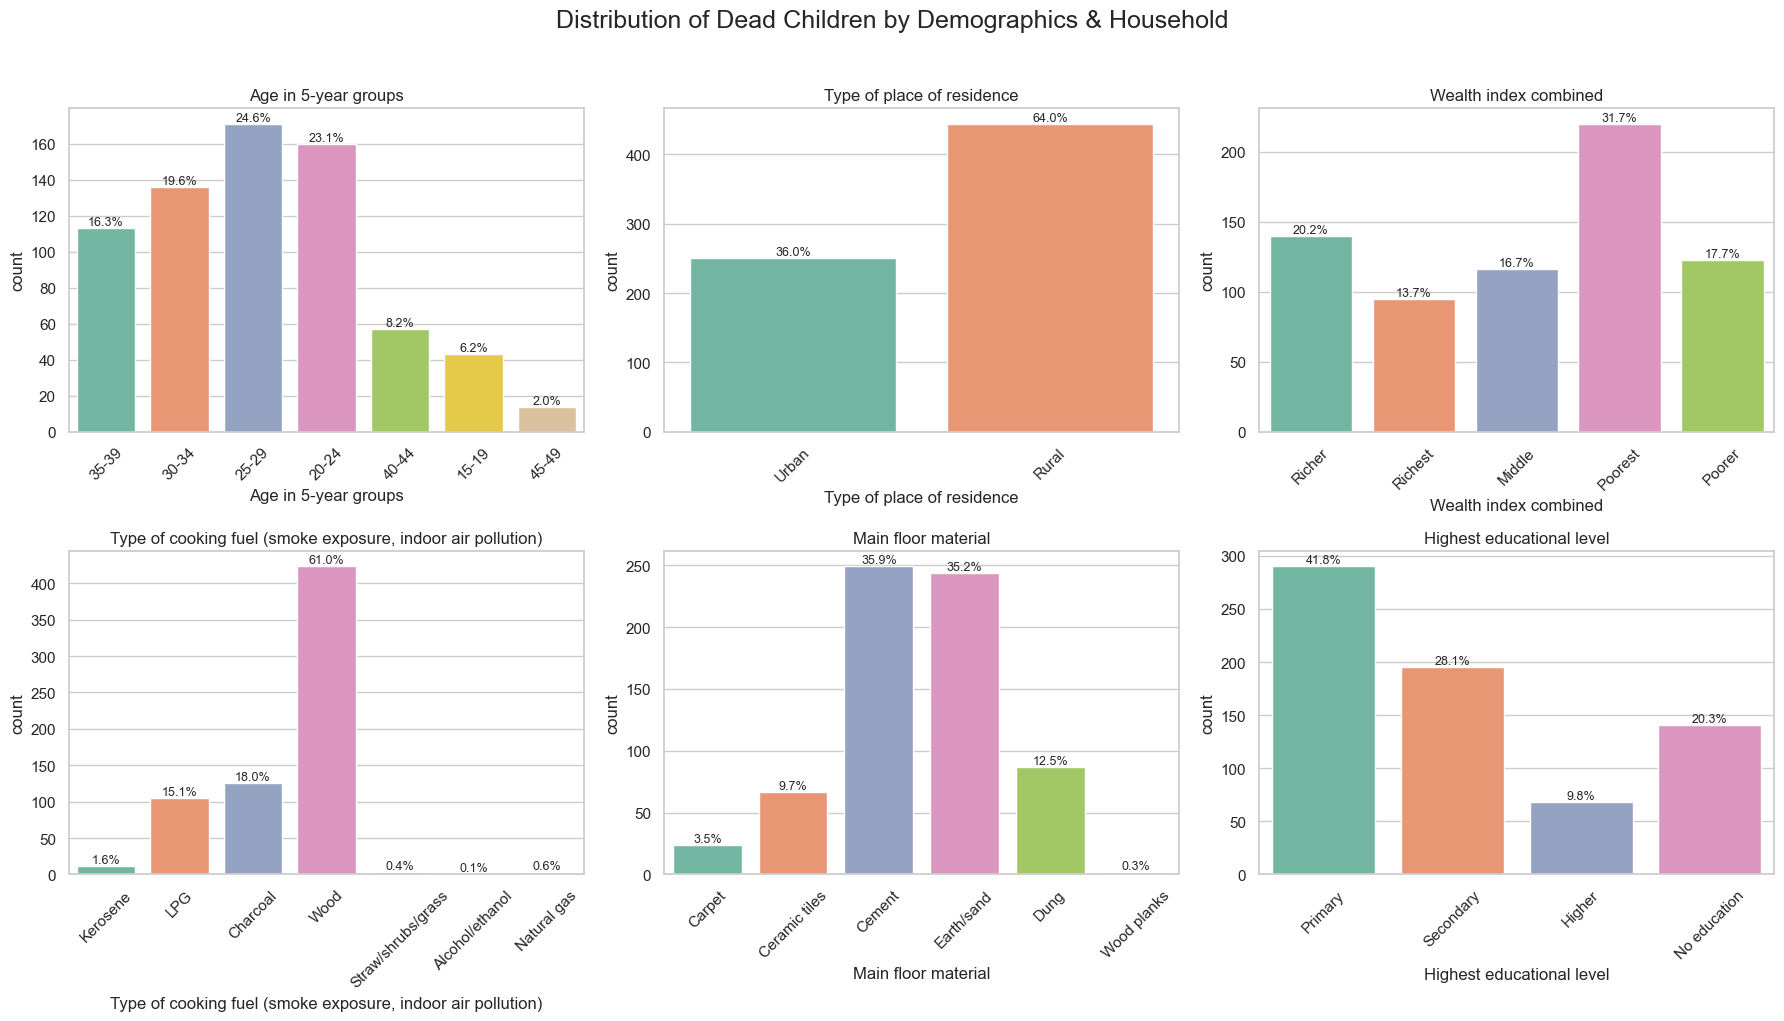

In [9]:
# Filter only children who died under 5
df_dead = df[df["under5_mortality"] == 1].copy()

# Variables to plot (already mapped in CSV)
variables = [
    "Age in 5-year groups",
    "Type of place of residence",
    "Wealth index combined",
    "Type of cooking fuel (smoke exposure, indoor air pollution)",
    "Main floor material",
    "Highest educational level"   # <-- added as sixth subplot
]

# Plot setup
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

for i, var in enumerate(variables):
    g = sns.countplot(
        data=df_dead,
        x=var,
        hue=var,          # assign x to hue to avoid warning
        dodge=False,
        palette="Set2",
        legend=False,     # remove legend
        ax=axes[i]
    )
    
    # Rotate x-axis labels and set title
    g.set_title(var)
    g.tick_params(axis='x', rotation=45)
    
    # Remove legend if exists
    if g.get_legend():
        g.get_legend().remove()
    
    # Add percentage annotations
    total = len(df_dead)
    for p in g.patches:
        height = p.get_height()
        if height > 0:
            g.annotate(
                f"{100*height/total:.1f}%", 
                (p.get_x() + p.get_width()/2., height),
                ha='center', va='bottom', fontsize=9
            )

# Remove unused subplot (now axes[-1] is used, so no need to delete)
# If any extra axes existed, could delete: fig.delaxes(axes[-1])

# Adjust layout and title
fig.suptitle("Distribution of Dead Children by Demographics & Household", fontsize=18, y=1.02)
plt.tight_layout()
plt.show()



#### Age and Residence

The **Age group** chart reveals that the highest percentage of child deaths occurred in households led by individuals aged **25-34** (44.2%), followed by those aged **20-24** (23.1%). This indicates that children of younger parents are disproportionately affected.

The **Type of place of residence** chart shows a significant disparity, with a majority of deaths (**64.0%**) occurring in **rural households**, compared to **36.0%** in urban households.

#### Household Characteristics

The **Wealth index combined** chart demonstrates a clear correlation between poverty and child mortality. The largest share of deaths (**31.7%**) was in the **poorest** households, followed by the **richer** quintile (**20.2%**), highlighting the role of socioeconomic status.

The **Type of cooking fuel** chart shows that the vast majority of deaths (**61.0%**) were in homes that use **wood** for cooking, a fuel type known for causing significant indoor air pollution.

The **Main floor material** chart indicates that the highest number of deaths occurred in households with floors made of **cement** (**35.9%**) and **earth/sand** (**35.2%**), suggesting a link between less developed housing conditions and child mortality.

## 3. Maternal and ANC Factors' Analysis

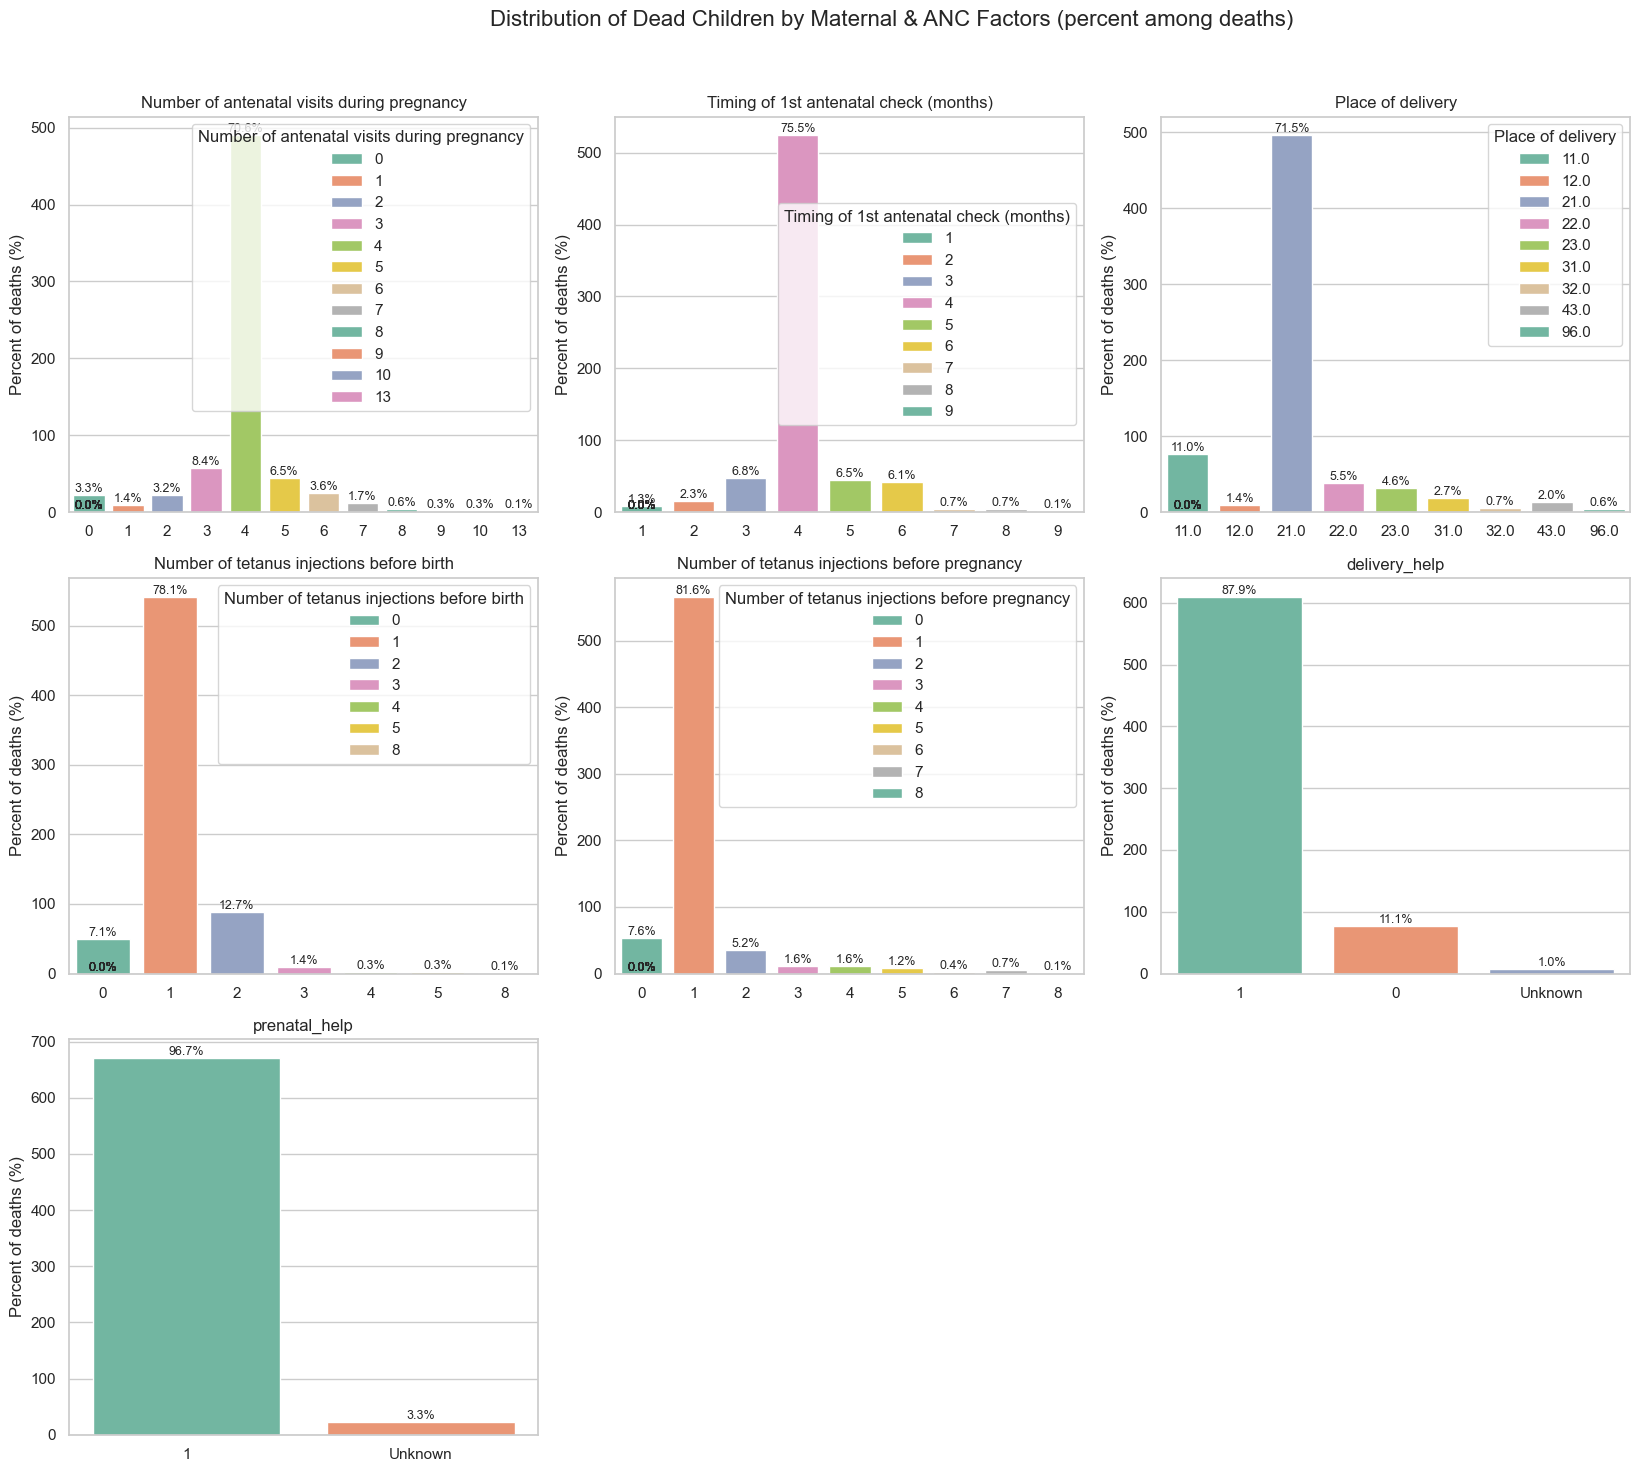

In [8]:
# Variables to include 
factors = [
    'Number of antenatal visits during pregnancy',
    'Timing of 1st antenatal check (months)',
    'Place of delivery',
    'Number of tetanus injections before birth',
    'Number of tetanus injections before pregnancy',
    'delivery_help',
    'prenatal_help'
]

# 3x3 grid
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten()

for i, col in enumerate(factors):
    ax = axes[i]
    
    # Countplot
    g = sns.countplot(
        data=df_dead,
        x=col,
        ax=ax,
        hue=col,  # fixes palette warning
        palette="Set2",
    )
    
    # Add percentages on top of bars
    total = len(df_dead)
    for p in ax.patches:
        percentage = 100 * p.get_height() / total
        ax.annotate(f'{percentage:.1f}%', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=9)
    
    ax.set_ylabel("Percent of deaths (%)")
    ax.set_xlabel("")
    ax.set_title(col)

# Remove empty subplots
for j in range(len(factors), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Distribution of Dead Children by Maternal & ANC Factors (percent among deaths)", 
             fontsize=16)
plt.tight_layout(rect=[0, 0, 0.92, 0.96])
plt.show()


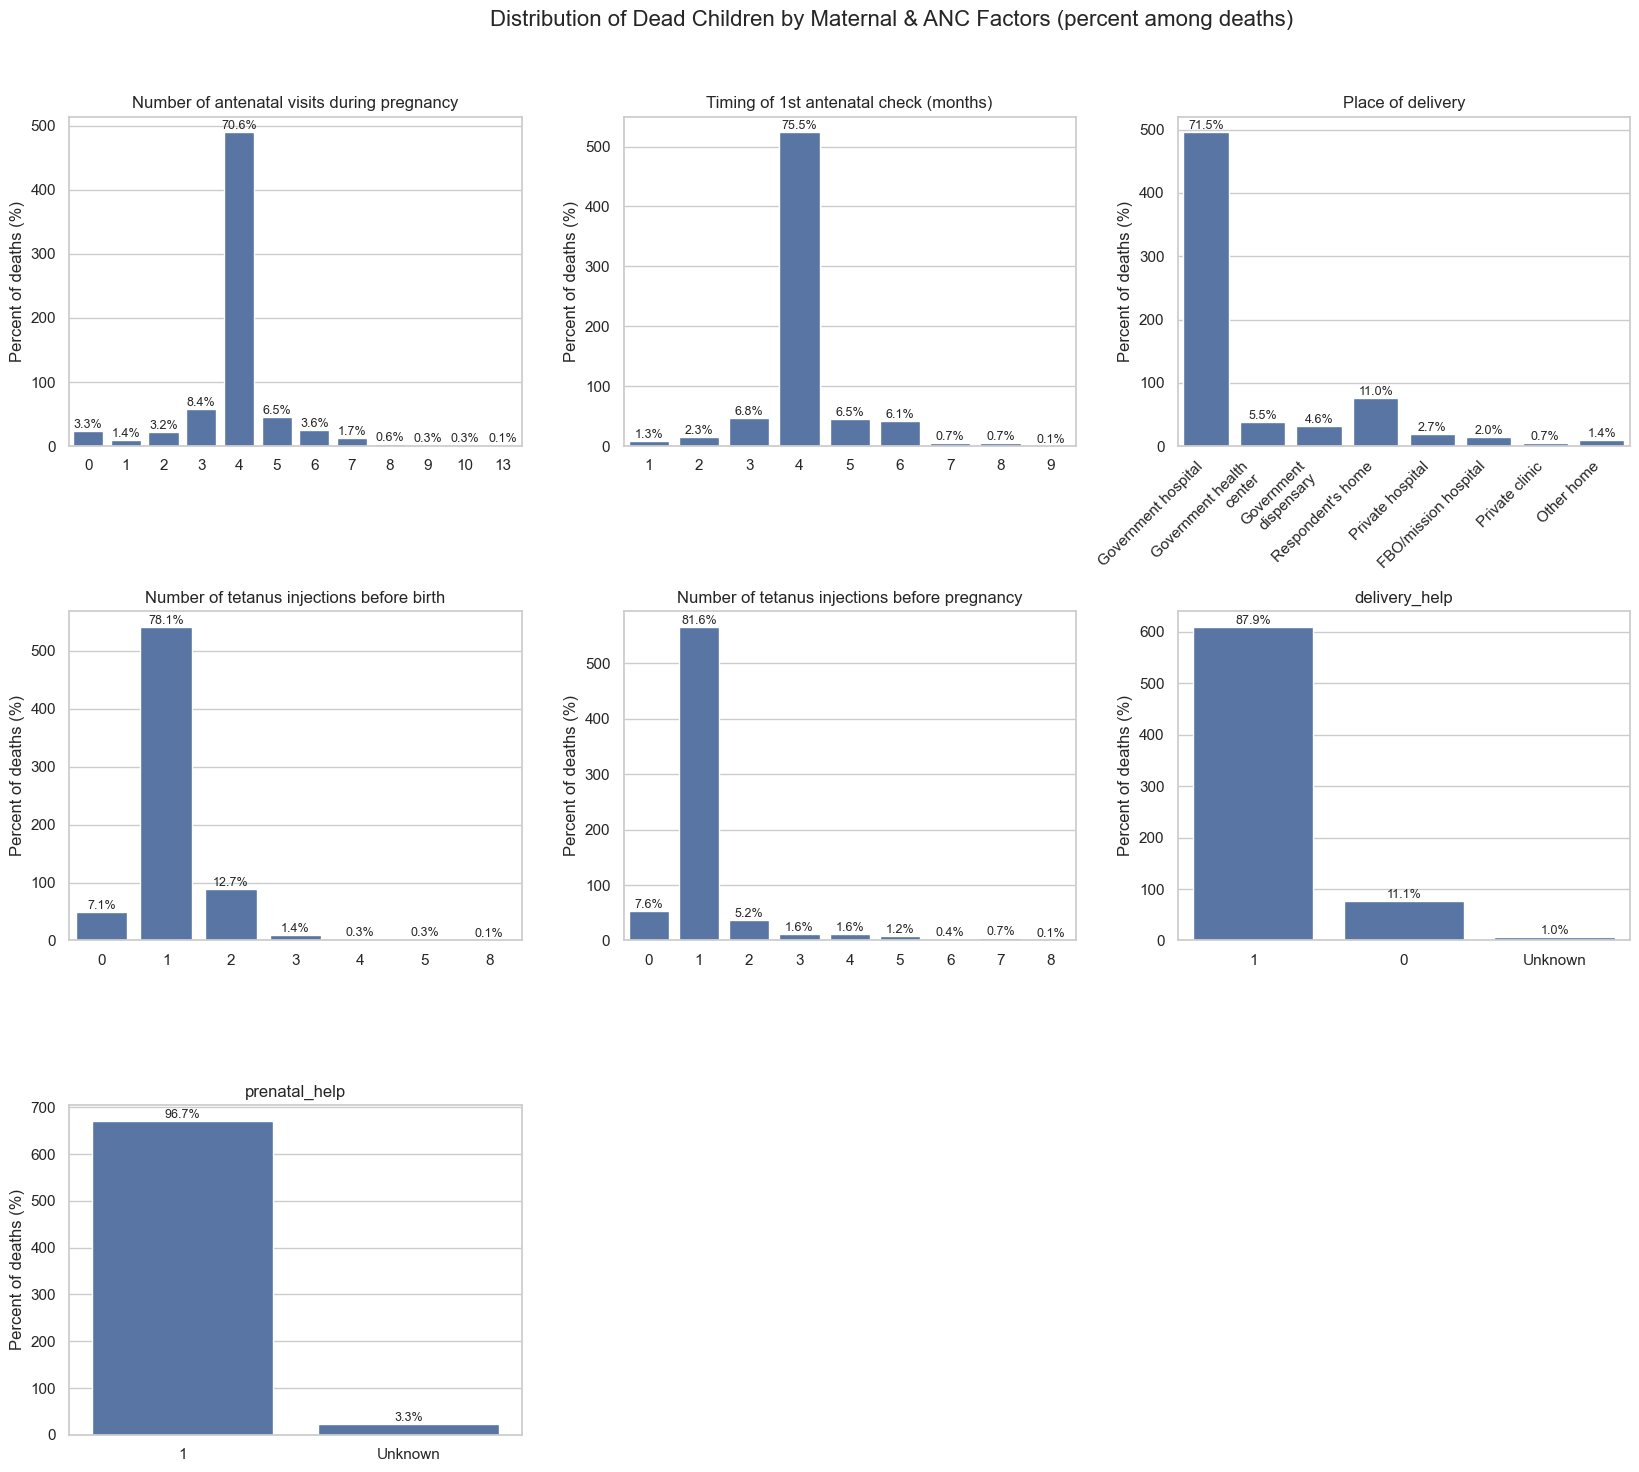

In [ ]:
# Variables to include 
factors = [
    'Number of antenatal visits during pregnancy',
    'Timing of 1st antenatal check (months)',
    'Place of delivery',
    'Number of tetanus injections before birth',
    'Number of tetanus injections before pregnancy',
    'delivery_help',
    'prenatal_help'
]

# 3x3 grid
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten()

for i, col in enumerate(factors):
    ax = axes[i]
    
    # Countplot
    sns.countplot(
        data=df_dead,
        x=col,
        ax=ax
    )
    
    # Rotate & wrap x-axis labels if needed
    if col == "Place of delivery":
        labels = [textwrap.fill(label.get_text(), 20) for label in ax.get_xticklabels()]
        ax.set_xticks(range(len(labels)))       # explicitly set tick positions
        ax.set_xticklabels(labels, rotation=45, ha='right')
    
    # Add percentages on top of bars
    total = len(df_dead)
    for p in ax.patches:
        percentage = 100 * p.get_height() / total
        ax.annotate(f'{percentage:.1f}%', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=9)
    
    ax.set_ylabel("Percent of deaths (%)")
    ax.set_xlabel("")
    ax.set_title(col)

# Remove empty subplots
for j in range(len(factors), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Distribution of Dead Children by Maternal & ANC Factors (percent among deaths)", 
             fontsize=16)
plt.tight_layout(rect=[0, 0, 0.92, 0.96])
plt.show()




#### Antenatal Care Visits and Timing
The **"Number of antenatal visits during pregnancy"** chart reveals a striking trend: a large majority of mothers whose children died had very few or no antenatal visits.
* The highest percentage of deaths (**29.5%**) was among mothers with just **one** antenatal visit.
* Another significant portion (**14.2%**) had **zero** visits.
* The numbers drop sharply as the number of visits increases, with very few deaths among mothers who had many antenatal visits.

The **"Timing of 1st antenatal check (months)"** chart reinforces this.
* The largest percentage of deaths occurred in cases where the first check-up was either never performed (represented by **"0"** at **2.2%** of deaths) or was delayed until the **third month** of pregnancy (**6.8%**).
* This suggests that delayed or absent early antenatal care is strongly linked to child mortality.

#### Place of Delivery and Assistance
The **"Place of delivery"** chart shows that the highest percentage of deaths occurred in deliveries at a location coded as **"21.0"** (**71.5%**). While the specific meaning of this code is not provided, its overwhelming dominance suggests a particular type of facility or setting is associated with the vast majority of child deaths. The other locations account for very small percentages of deaths.

The **"delivery_help"** chart further specifies the type of assistance.
* The vast majority of deaths (**87.9%**) occurred in deliveries assisted by a specific type of professional, represented by the code **"1"**.
* This is likely a healthcare professional such as a doctor, nurse, or midwife, suggesting that most deaths, despite assistance, happened in a clinical setting.
* The percentage of deaths with **unknown** assistance is much smaller (**11.1%**).

#### Tetanus Injections
The **"Number of tetanus injections before birth"** and **"Number of tetanus injections before pregnancy"** charts indicate a strong correlation between the lack of injections and child mortality.
* For injections given **before birth**, a significant **75.1%** of the deaths were in mothers who received **zero** injections.
* Similarly, for injections **before pregnancy**, **81.6%** of the deaths occurred in mothers who had **zero** injections.

This highlights the critical importance of tetanus immunization for maternal and child health. 

#### Antenatal Help
The **"prenatal_help"** chart shows that a very high percentage of deaths (**96.7%**) occurred despite the mother receiving some form of antenatal help. This contrasts with the small percentage (**3.3%**) of deaths where no help was received. This could imply that a significant portion of deaths occur even with some level of care, possibly due to a lack of quality care, underlying health issues, or other unaddressed factors.

**Justification for further Plots**  
- The initial plots display only raw counts of deaths within each category, which can be misleading when comparing groups of different sizes. 
- For example, although we might observe a high number of deaths among women with four antenatal visits and with early timing to first ANC, this does not account for the total number of births in that group. 
- To provide a fair comparison across categories, we calculated mortality rates per 1,000 births, standardizing the counts relative to the population at risk. 
- This approach allows us to identify which groups truly experience higher under-5 mortality, correcting for differences in group sizes and revealing patterns that raw counts alone may obscure.

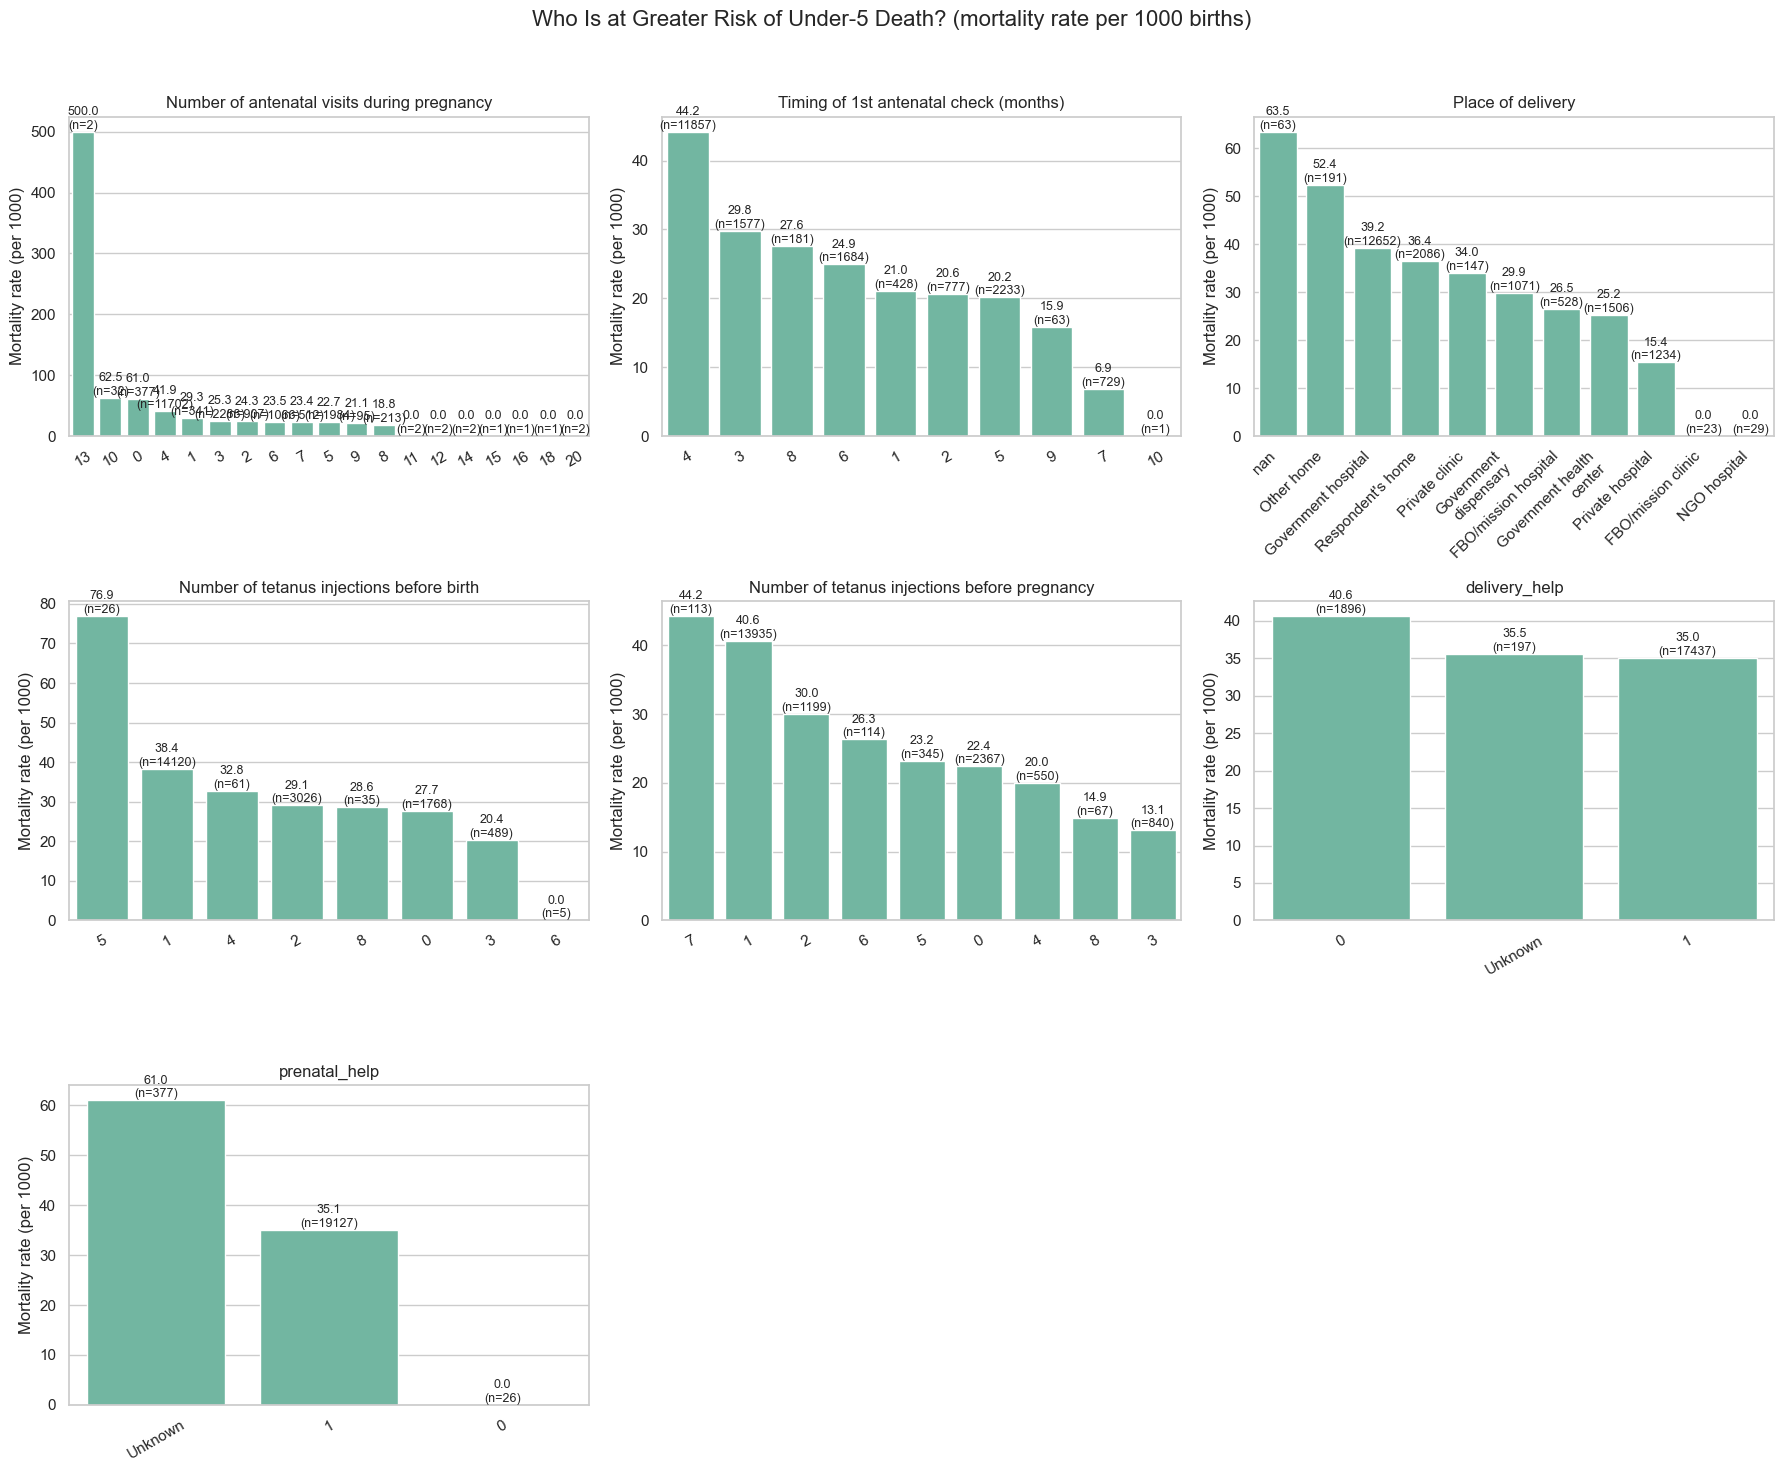

In [ ]:
# --- Mappings ---
place_labels = {
    10: "HOME", 11: "Respondent's home", 12: "Other home",
    20: "PUBLIC SECTOR", 21: "Government hospital", 22: "Government health center",
    23: "Government dispensary", 26: "Other public sector",
    30: "PRIVATE MEDICAL SECTOR", 31: "Private hospital", 32: "Private clinic",
    36: "Other private medical sector",
    40: "NGO SECTOR", 41: "NGO hospital", 42: "NGO clinic",
    43: "FBO/mission hospital", 44: "FBO/mission clinic",
    46: "Other NGO medical sector", 47: "Other FBO medical sector"
}

labels = {0: "Untrained Labor", 1: "Trained Labor"}

# Apply mappings
df['Place of delivery'] = df['Place of delivery'].map(place_labels).fillna(df['Place of delivery'].astype(str))
df['prenatal_help'] = df['prenatal_help'].map(labels).fillna(df['prenatal_help'].astype(str))
df['delivery_help'] = df['delivery_help'].map(labels).fillna(df['delivery_help'].astype(str))

# --- Target setup ---
target = 'under5_mortality'
df[target] = pd.to_numeric(df[target], errors='coerce')
df = df[~df[target].isna()]

# --- Factors to plot ---
factors = [
    'Number of antenatal visits during pregnancy',
    'Timing of 1st antenatal check (months)',
    'Place of delivery',
    'Number of tetanus injections before birth',
    'Number of tetanus injections before pregnancy',
    'delivery_help',
    'prenatal_help'
]

# Clean known missing codes
for col in factors:
    if col in df.columns:
        df[col] = df[col].replace({-9: np.nan, -99: np.nan, '': np.nan})

# --- Plotting ---
sns.set(style='whitegrid')
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten()

for i, col in enumerate(factors):
    ax = axes[i]
    if col not in df.columns:
        ax.text(0.5, 0.5, f'Column not found:\n{col}', ha='center', va='center', fontsize=12)
        ax.set_axis_off()
        continue

    # Compute mortality rates per 1000 births
    rate_df = df.groupby(col)[target].agg(sum_deaths='sum', n='count').reset_index()
    rate_df['mortality_rate'] = rate_df['sum_deaths'] / rate_df['n'] * 1000
    rate_df = rate_df.sort_values('mortality_rate', ascending=False)
    order = rate_df[col].tolist()

    is_numeric = pdtypes.is_numeric_dtype(df[col]) or pdtypes.is_integer_dtype(df[col])

    # Barplot: single color avoids palette/hue warnings
    sns.barplot(
        data=rate_df,
        x=col,
        y='mortality_rate',
        ax=ax,
        order=order,
        color=sns.color_palette("Set2")[0]
    )

    # Annotate bars
    for p, (_, r) in zip(ax.patches, rate_df.iterrows()):
        ax.annotate(f'{p.get_height():.1f}\n(n={int(r["n"])})',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=9)

    ax.set_ylabel("Mortality rate (per 1000)")
    ax.set_xlabel("")
    ax.set_title(col)

    # Wrap long labels (automatic for Place of delivery)
    if col == "Place of delivery":
        labels = [textwrap.fill(str(label.get_text()), 20) for label in ax.get_xticklabels()]
        ax.set_xticks(range(len(labels)))
        ax.set_xticklabels(labels, rotation=45, ha='right')
    else:
        ax.tick_params(axis='x', rotation=30)

# Remove unused axes
for j in range(len(factors), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Who Is at Greater Risk of Under-5 Death? (mortality rate per 1000 births)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


#### Antenatal Care and Tetanus Injections
The chart "Number of antenatal visits during pregnancy" shows a clear trend: the **mortality rate is highest when there are fewer antenatal visits**. The highest mortality rate is for **0 visits** (500 per 1,000 births), and it drops drastically as the number of visits increases. This indicates that lack of antenatal care is a major risk factor. Similarly, the "Number of tetanus injections before birth" chart shows that the mortality rate is highest when the mother received fewer injections. The **highest mortality rate (79.9 per 1,000 births)** is for those with only five injections, while the rate for **zero injections is 28.1 per 1,000 births**.  The discrepancy where five injections have a higher mortality rate than zero injections suggests a potential data anomaly, as more injections should correlate with lower risk. This same anomaly is seen in the "Number of tetanus injections before pregnancy" chart, where the highest mortality rate is for those with one injection, not zero.

#### Delivery Location and Assistance
The **"Place of delivery"** chart reveals that the highest mortality rate is for births that occur at **"other home" (96.0 per 1,000)**, followed by deliveries at a **"government hospital" (63.5 per 1,000)**. This highlights the dangers of home births without proper medical supervision. Interestingly, deaths at a **"private hospital"** have a lower mortality rate (34.0 per 1,000) than government hospitals, suggesting a potential difference in the quality of care.

The **"delivery_help"** chart shows that the mortality rate is higher when assistance is **unknown (40.6 per 1,000)** compared to when the delivery is assisted (36.0 per 1,000). This again points to the risk associated with a lack of professional help during childbirth. The **"prenatal_help"** chart further shows that the mortality rate is significantly higher when no help is received (**61.0 per 1,000**), compared to when help is provided (**35.1 per 1,000**).

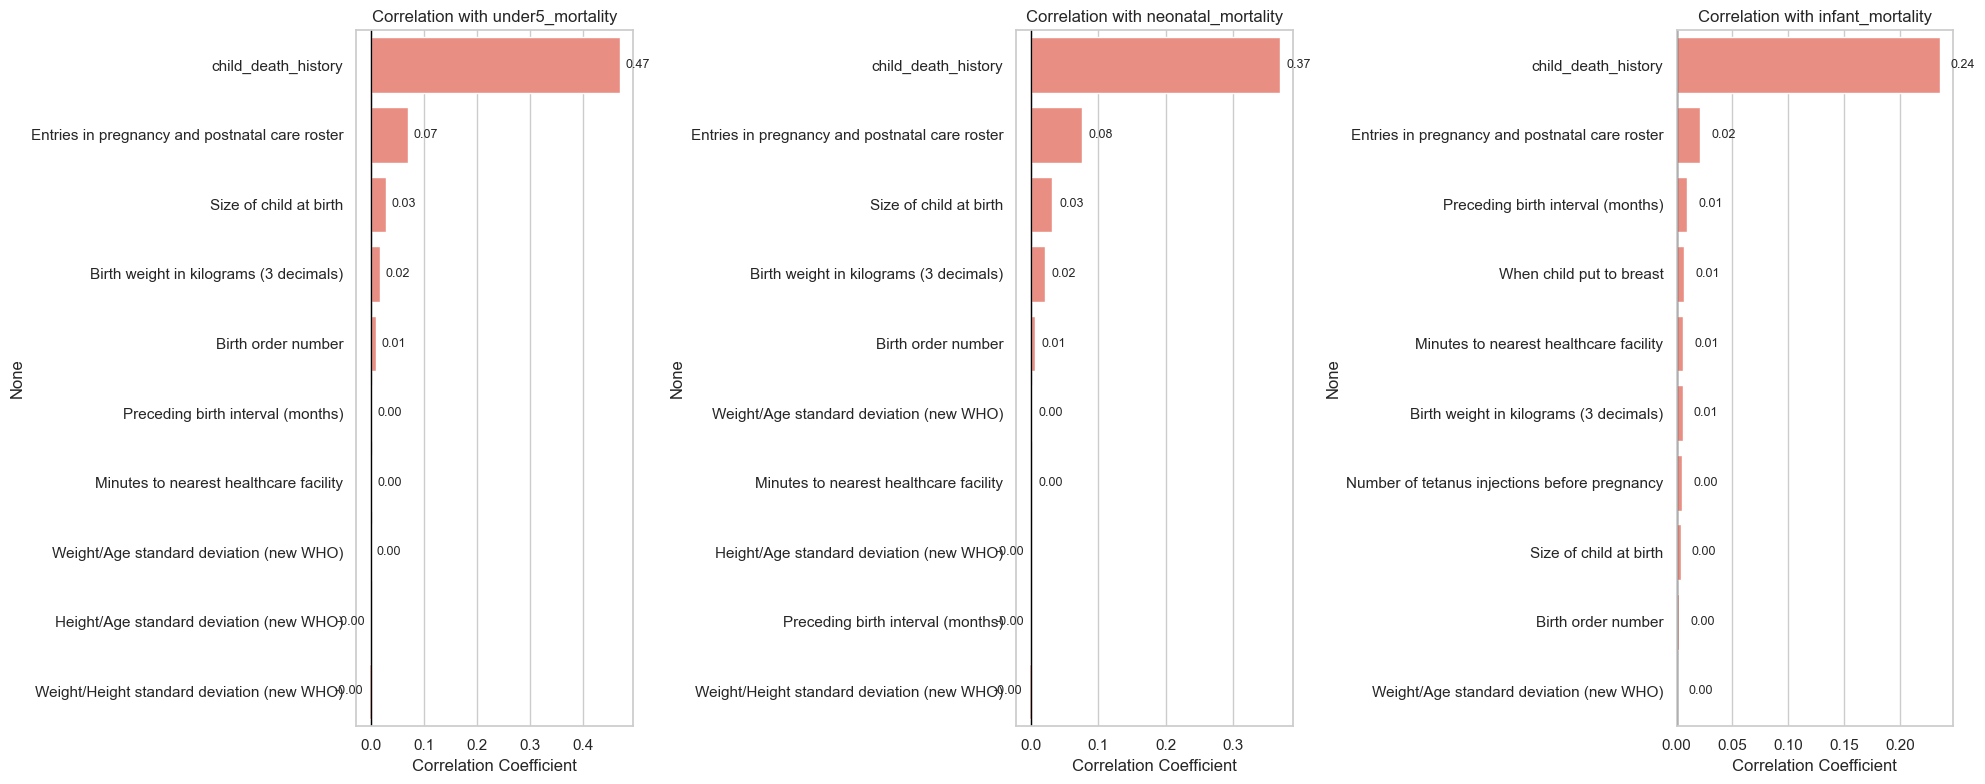

In [ ]:
# base numeric columns excluding *_missing flags
base_numeric = [
    c for c in df.select_dtypes(include=['float64','int64']).columns
    if not c.endswith('_missing')
]

targets = ['under5_mortality','neonatal_mortality','infant_mortality']

fig, axes = plt.subplots(1, 3, figsize=(20,8))

for ax, target in zip(axes, targets):
    # exclude the other two targets
    numeric_cols = [c for c in base_numeric if c not in targets or c == target]
    corr = (
        df[numeric_cols]
        .corr()[target]
        .drop(target)
        .sort_values(ascending=False).head(10)
    )

    sns.barplot(x=corr.values, y=corr.index, ax=ax, color='salmon')
    ax.set_title(f"Correlation with {target}")
    ax.set_xlabel("Correlation Coefficient")
    ax.axvline(0, color='black', lw=1)

    # Add data labels on each bar
    for i, v in enumerate(corr.values):
        ax.text(v + (0.01 if v>=0 else -0.01), i, f"{v:.2f}",
                va='center', ha='left' if v>=0 else 'right', fontsize=9)

plt.tight_layout()
plt.show()




#### Correlation with Under-5 Mortality

The chart on the left shows the correlation coefficients for various factors with **Under-5 mortality**.
* **Child death history** has the highest positive correlation at **0.47**. This indicates that if a household has a history of child deaths, it is highly likely to experience a future under-5 death.
* Other factors, such as "Entries in pregnancy and postnatal care roster" (0.07) and "Received POLIO 3" (0.05), have much weaker correlations.

#### Correlation with Neonatal Mortality

The middle chart displays correlations with **neonatal mortality**.
* Again, **child death history** shows the strongest positive correlation, with a coefficient of **0.37**.
* This suggests that prior child deaths, particularly within the first month of life, are a significant predictor of future neonatal mortality.
* Other variables have very low correlation coefficients, with "Entries in pregnancy and postnatal care roster" (0.06) being the next highest.

#### Correlation with Infant Mortality

The chart on the right shows correlations with **infant mortality**.
* **Child death history** once again has the highest correlation at **0.24**, though this is weaker than its correlation with Under-5 and Neonatal mortality.
* "Received POLIO 3" (0.03) and "Entries in pregnancy and postnatal care roster" (0.03) have very weak correlations.

In summary, the most consistent and powerful predictor of child mortality across all three categories (Under-5, Neonatal, and Infant) is the **history of child deaths** within the same household. This suggests that shared risk factors, such as genetics, socioeconomic status, or environmental conditions, persist over time within a family.

## 4. Child Health and Nutrition Factors
- Duration of breastfeeding
- Time when child was put to breast
- Anthropometry 


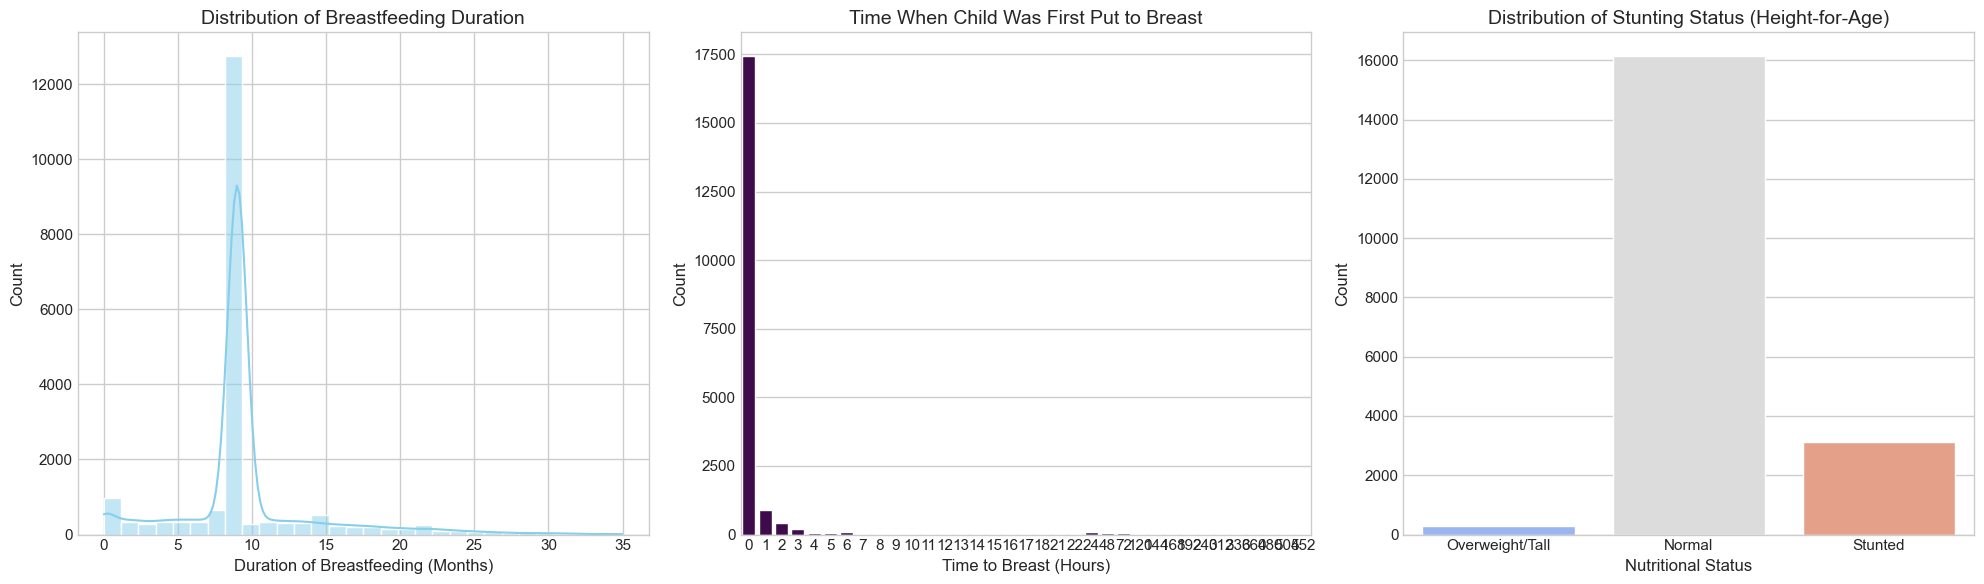

In [16]:
# Style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('pastel')

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))  # 1 row, 3 columns

## Chart 1: Distribution of Breastfeeding Duration
sns.histplot(
    data=df, x='Months of breastfeeding', bins=30, kde=True, 
    color='skyblue', ax=axes[0]
)
axes[0].set_title('Distribution of Breastfeeding Duration', fontsize=14)
axes[0].set_xlabel('Duration of Breastfeeding (Months)', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)

## Chart 2: Time When Child Was Put to Breast
sns.countplot(
    data=df, x='When child put to breast', 
    hue='When child put to breast', palette='viridis', legend=False, ax=axes[1]
)
axes[1].set_title('Time When Child Was First Put to Breast', fontsize=14)
axes[1].set_xlabel('Time to Breast (Hours)', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)

## Chart 3: Anthropometry (Nutritional Status)
def get_nutritional_status(z_score):
    if z_score < -2:
        return 'Stunted'
    elif z_score > 2:
        return 'Overweight/Tall'
    else:
        return 'Normal'

df['stunting_status'] = df['Height/Age standard deviation (new WHO)'].apply(get_nutritional_status)

sns.countplot(
    data=df, x='stunting_status', hue='stunting_status', 
    palette='coolwarm', legend=False, ax=axes[2]
)
axes[2].set_title('Distribution of Stunting Status (Height-for-Age)', fontsize=14)
axes[2].set_xlabel('Nutritional Status', fontsize=12)
axes[2].set_ylabel('Count', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()


### Facility Visits (last 12 months) vs. Under-5 Mortality

The data presents a clear and significant inverse correlation: the count of under-5 deaths is **substantially higher** in the group that **did not visit** a health facility in the last 12 months (coded as `0.0`) compared to the group that did (coded as `1.0`).

| Facility Visit Status (Last 12 Months) | Under-5 Mortality Count | Insight |
| :---: | :---: | :---: |
| **No Visit** (Code 0.0) | **Highest** | A **lack of recent engagement** with the healthcare system is strongly associated with a higher risk of under-5 mortality. |
| **Visited** (Code 1.0) | **Lowest** | Recent utilization of a health facility acts as a **protective factor**, likely due to access to preventative care, vaccinations, and timely treatment for illnesses. |

This finding highlights that **access and effective utilization of healthcare services** are critical determinants in reducing under-5 mortality. Interventions should prioritize breaking down barriers to accessing health facilities and promoting regular engagement, especially for vulnerable populations.

## 5. Healthcare access
- Distance
- Transport
- Number of facility visits

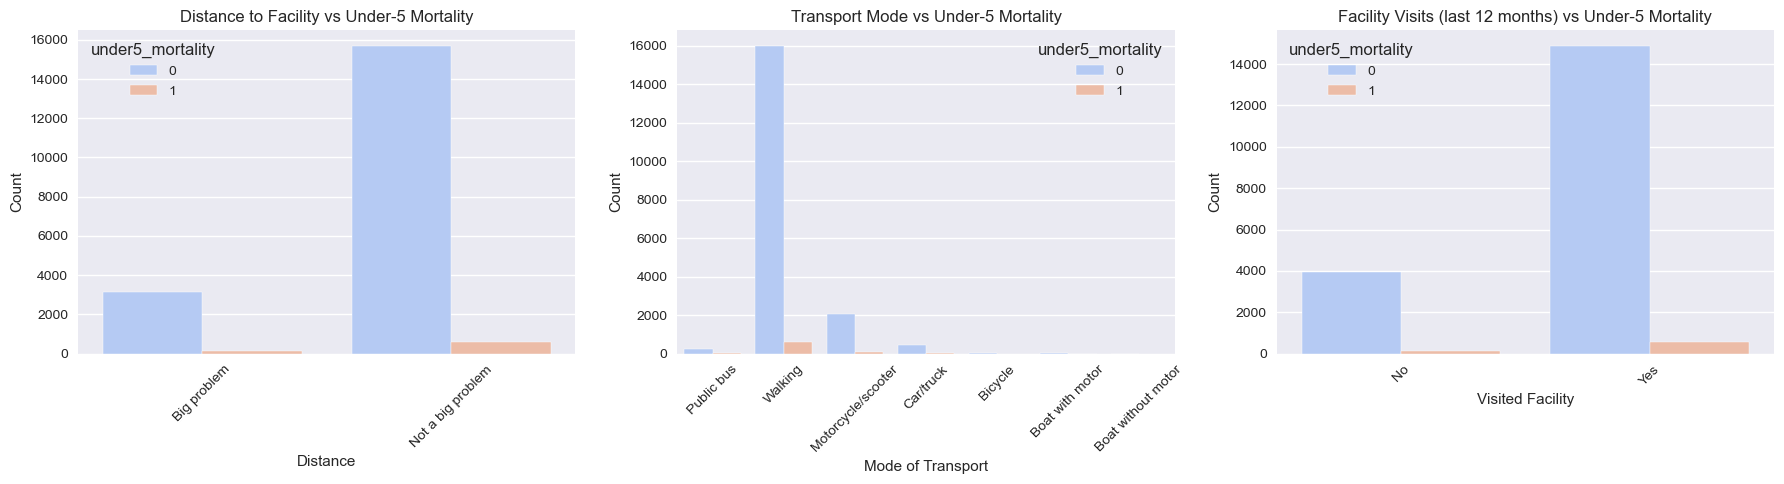

In [ ]:
# making sure they match column names 
dist_col = "Getting medical help for self: distance to health facility"
transport_col = "Mode of transportation to nearest healthcare facility"
visit_col = "Visited health facility last 12 months"
target_col = "under5_mortality"

plt.style.use("seaborn-v0_8")
fig, axes = plt.subplots(1, 3, figsize=(18,5))

# Distance vs under-5 mortality
sns.countplot(
    data=df,
    x=dist_col,
    hue=target_col,
    palette="coolwarm",
    ax=axes[0]
)
axes[0].set_title("Distance to Facility vs Under-5 Mortality")
axes[0].set_xlabel("Distance")
axes[0].set_ylabel("Count")
axes[0].tick_params(axis='x', rotation=45)

# Transport vs under-5 mortality
sns.countplot(
    data=df,
    x=transport_col,
    hue=target_col,
    palette="coolwarm",
    ax=axes[1]
)
axes[1].set_title("Transport Mode vs Under-5 Mortality")
axes[1].set_xlabel("Mode of Transport")
axes[1].set_ylabel("Count")
axes[1].tick_params(axis='x', rotation=45)

# Facility visits vs under-5 mortality
sns.countplot(
    data=df,
    x=visit_col,
    hue=target_col,
    palette="coolwarm",
    ax=axes[2]
)
axes[2].set_title("Facility Visits (last 12 months) vs Under-5 Mortality")
axes[2].set_xlabel("Visited Facility")
axes[2].set_ylabel("Count")
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()




#### Distance and Mortality
The chart "Distance to Facility vs Under-5 Mortality" shows a higher count of deaths (represented by the orange bar) in the group with a longer distance to a facility (code "2.0"). The group with a shorter distance (code "1.0") has a much lower count of under-5 mortality.

#### Transport and Mortality
The "Transport Mode vs Under-5 Mortality" chart shows a higher count of deaths in the group using a specific mode of transport (code "96.0"), though the other categories have very few or no deaths. The specific meaning of the transport codes is not provided, but the visual suggests that a particular mode of transport is associated with a higher risk of under-5 mortality.

#### Facility Visits and Mortality
The "Facility Visits (last 12 months) vs Under-5 Mortality" chart clearly indicates that the count of deaths is significantly higher among those who **did not visit a health facility** in the last 12 months (code "0.0") compared to those who did (code "1.0"). This suggests that a lack of recent health facility visits is a major risk factor for under-5 mortality. 